In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Exercise 3

### part a

In [2]:
def generate_data_A(n, d):
    I = np.identity(d)
    mean = np.zeros(d)
    data = np.random.multivariate_normal(mean, I, n)
    return data

def empirical_mean(data, n):
    emp_mean = np.sum(data, axis = 0) * (1/n)
    return emp_mean

In [3]:
def t_opt(n, X, Y, emp_mean):
    X_dot = np.dot(X, emp_mean)
    Y_dot = np.dot(Y, emp_mean)
    XY_dot = np.concatenate((X_dot,Y_dot),axis=0)
    highest_acc = 0
    for thre in XY_dot:
        X_true = np.array([x for x in X_dot if x >= thre])
        Y_true = np.array([x for x in Y_dot if x < thre])

        acc = (X_true.shape[0] + Y_true.shape[0])/XY_dot.shape[0]
        if acc > highest_acc:
            highest_acc = acc
            threshold = thre
    # print(highest_acc)
    return float(threshold), float(highest_acc)

In [4]:
def find_t_a(n):
    dim = [i for i in range(10, 501)]
    thresholds = []
    accuracies = []
    for d in dim:
        X = generate_data_A(n, d)
        Y = generate_data_A(n, d)
        emp_mean = empirical_mean(X, n)
        t, acc = t_opt(n, X, Y, emp_mean)
        # print("At d = {}\tThe threshold is {} and the accuracy is {}".format(d, t, acc))
        thresholds.append(t)
        accuracies.append(acc)
    return thresholds, accuracies

In [5]:
thresholds, accuracies = find_t_a(50)

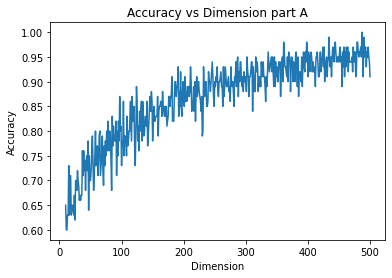

In [6]:
dim = [i for i in range(10, 501)]
plt.plot(dim, accuracies)
plt.title("Accuracy vs Dimension part A")
plt.xlabel("Dimension")
plt.ylabel("Accuracy")
# plt.xticks(accuracies,dim)
plt.show()

In [7]:
def acc_calc_A(X, Y, emp_mean, thre):
    X_dot = np.dot(X, emp_mean)
    Y_dot = np.dot(Y, emp_mean)
    X_true = np.array([x for x in X_dot if x >= thre])
    Y_true = np.array([x for x in Y_dot if x < thre])

    acc = (X_true.shape[0] + Y_true.shape[0])/(X.shape[0] + Y.shape[0])
    return acc

In [8]:
def generalization_A(n, thresholds):
    accuracies = []
    # np.random.seed(2)
    dim = [i for i in range(10, 501)]
    for i in range(len(dim)):
        X = generate_data_A(n, dim[i])
        Y = generate_data_A(n, dim[i])
        emp_mean = empirical_mean(X, n)
        acc = acc_calc_A(X, Y, emp_mean, thresholds[i])
        accuracies.append(acc)
    
    return accuracies

In [9]:
generalized_accuracies = generalization_A(50, thresholds)

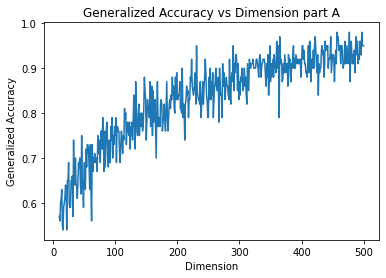

In [10]:
dim = [i for i in range(10, 501)]
# plt.plot(dim, accuracies)
plt.plot(dim, generalized_accuracies)
plt.title("Generalized Accuracy vs Dimension part A")
plt.xlabel("Dimension")
plt.ylabel("Generalized Accuracy")
# plt.xlim([10, 500])
plt.show()

In [11]:
def acc_calc_mia(X, Y, mu_t):
    X_dot = np.dot(X, mu_t)
    Y_dot = np.dot(Y, mu_t)
    XY_dot = np.concatenate((X_dot,Y_dot),axis=0)
    for thre in XY_dot:
        X_true = np.array([x for x in X_dot if x >= thre])
        Y_true = np.array([x for x in Y_dot if x < thre])
        acc = (X_true.shape[0] + Y_true.shape[0])/XY_dot.shape[0]
        L2_mu = float(np.linalg.norm(mu_t, ord=2))
    return acc, L2_mu

In [12]:
def protect_mia(n):
    # initial
    sigmas2 = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
    d = 50
    mean = np.zeros(d)
    I = np.identity(d)

    # dictionary store the highest accuracy and the corresponding threshold
    ave_acc = dict()
    L2_mean = dict()
    # for each sigmas^2 initial accuracy and threshold as 0
    for s in sigmas2:
        ave_acc[s] = 0
        L2_mean[s] = 0
        for count in range(1000):
            X = generate_data_A(n, d)
            Y = generate_data_A(n, d)
            emp_mean = empirical_mean(X, n)
            # calc mu tilta
            mu_dp = emp_mean + np.random.multivariate_normal(mean, I * s, 1).reshape((d,))
            acc, L2_mu = acc_calc_mia(X, Y, mu_dp)
            ave_acc[s] += acc
            # thresholds[s] = thre_count
            L2_mean[s] += L2_mu
        ave_acc[s] /= 1000
        L2_mean[s] /= 1000
    
    print(ave_acc, L2_mean)
            
    return ave_acc, L2_mean

In [13]:
ave_acc, L2_mean = protect_mia(50)

{0.1: 0.5519699999999991, 0.2: 0.5343799999999985, 0.3: 0.5296899999999988, 0.4: 0.5275399999999991, 0.5: 0.5252299999999999, 0.6: 0.5195199999999991, 0.7: 0.518339999999999, 0.8: 0.5173499999999992, 0.9: 0.5156799999999994, 1: 0.51388} {0.1: 2.4307881116159695, 0.2: 3.2875148839334716, 0.3: 3.9636245661629057, 0.4: 4.552550990422171, 0.5: 5.061834364906931, 0.6: 5.536126583002459, 0.7: 5.988489180775398, 0.8: 6.349643986901724, 0.9: 6.734323433577196, 1: 7.098591578169375}


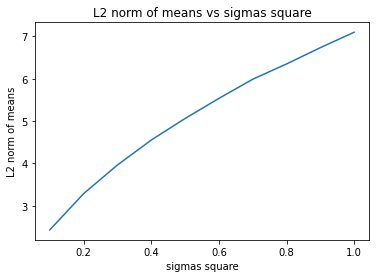

In [14]:
sigmas2 = list(L2_mean.keys())
mean = list(L2_mean.values())
plt.plot(sigmas2, mean)
plt.title("L2 norm of means vs sigmas square")
plt.xlabel("sigmas square")
plt.ylabel("L2 norm of means")
plt.show()

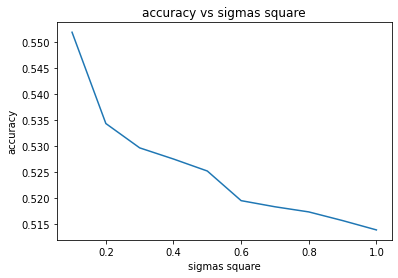

In [15]:
sigmas2 = list(L2_mean.keys())
accuracy = list(ave_acc.values())
plt.plot(sigmas2, accuracy)
plt.title("accuracy vs sigmas square")
plt.xlabel("sigmas square")
plt.ylabel("accuracy")
plt.show()

### part b

In [16]:
from sklearn.linear_model import LogisticRegression
from keras.datasets import fashion_mnist

In [17]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [18]:
X_train, X_test = X_train / 255.0, X_test / 255.0
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [19]:
N = [100, 200, 400, 800, 1600, 2500, 5000, 10000]

In [20]:
def train_logistic_regression(X, y, reg, c):
    clf = LogisticRegression(penalty=reg, C=c, max_iter = 100, tol = 0.1).fit(X, y)
    return clf

In [21]:
def run(X_train, y_train, X_test, y_test, N, reg, c):
    train_acc = []
    test_acc = []
    model = []
    for n in N:
        print("current n: ", n)
        train_X, test_X = X_train[:n,:], X_test[:n,:]
        train_y, test_y = y_train[:n], y_test[:n]
        clf = train_logistic_regression(train_X, train_y, reg, c)
        train_acc.append(clf.score(train_X, train_y))
        test_acc.append(clf.score(test_X, test_y))
        model.append(clf)
    return train_acc, test_acc, model

In [22]:
train_acc_noreg, test_acc_noreg, model_noreg = run(X_train, y_train, X_test, y_test, N, 'none', 1.0)

current n:  100
current n:  200
current n:  400
current n:  800
current n:  1600


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


current n:  2500


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


current n:  5000


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


current n:  10000


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


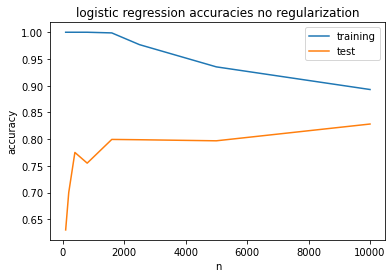

In [23]:
plt.plot(N, train_acc_noreg, label = "training")
plt.plot(N, test_acc_noreg, label = "test")
plt.title("logistic regression accuracies no regularization")
plt.xlabel("n")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [24]:
train_acc_reg, test_acc_reg, model_reg = run(X_train, y_train, X_test, y_test, N, 'l2', 0.01)

current n:  100
current n:  200
current n:  400
current n:  800
current n:  1600


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


current n:  2500


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


current n:  5000


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


current n:  10000


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


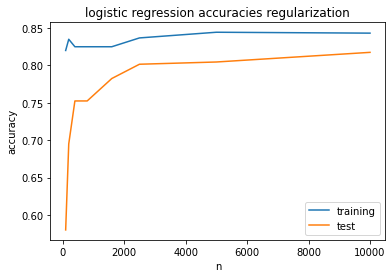

In [25]:
plt.plot(N, train_acc_reg, label = "training")
plt.plot(N, test_acc_reg, label = "test")
plt.title("logistic regression accuracies regularization")
plt.xlabel("n")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [26]:
def split_dataset(n, X_train, X_test, y_train, y_test):
    train_X, test_X = X_train[:n,:], X_test[:n,:]
    train_y, test_y = y_train[:n], y_test[:n]
    return train_X, test_X, train_y, test_y

In [27]:
def clf_attack(N, X_train, X_test, y_train, y_test, model, reg, c):
    accuracies = []
    for i in range(len(N)):
        IN = []
        # IN_y = []
        OUT = []
        # OUT_y = []
        train_X, test_X, train_y, test_y = split_dataset(N[i], X_train, X_test, y_train, y_test)

        data = np.concatenate((train_X,test_X),axis=0)
        labels = np.concatenate((train_y,test_y),axis=0)
        pred_data = model[i].predict(data)

        for j in range(len(pred_data)):
            if pred_data[j] == labels[j]:
                IN.append(j)
                # IN.append(data[j])
                # IN_y.append(labels[j])
            else:
                OUT.append(j)
                # OUT.append(data[j])
                # OUT_y.append(labels[j])
        
        # IN = np.array(IN)
        # IN_y = np.array(IN_y)
        # OUT = np.array(OUT)
        # OUT_y = np.array(OUT_y)
        # print(IN.shape)
        # print(OUT.shape)
        # print(model[1])

        # clf_IN = train_logistic_regression(IN, IN_y, reg, c)
        # acc = clf_IN.score(OUT, OUT_y)
        # accuracies.append(acc)

        
        true_IN = np.array([x for x in IN if x <= N[i]-1])
        true_OUT = np.array([x for x in OUT if x > N[i]-1])


        acc = (true_IN.shape[0] + true_OUT.shape[0])/len(data)
        accuracies.append(acc)
        print("N = {}, the accuracy is: {}".format(N[i], acc))
    return accuracies

In [39]:
clf_noreg_attacc = clf_attack(N, X_train, X_test, y_train, y_test, model_noreg, 'none', 1)

N = 100, the accuracy is: 0.685
N = 200, the accuracy is: 0.65
N = 400, the accuracy is: 0.6125
N = 800, the accuracy is: 0.6225
N = 1600, the accuracy is: 0.5996875
N = 2500, the accuracy is: 0.589
N = 5000, the accuracy is: 0.5692
N = 10000, the accuracy is: 0.5323


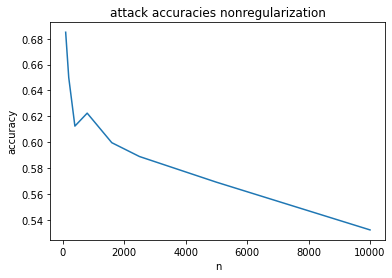

In [29]:
plt.plot(N, clf_noreg_attacc)
plt.title("attack accuracies nonregularization")
plt.xlabel("n")
plt.ylabel("accuracy")
plt.show()

In [38]:
clf_reg_attacc = clf_attack(N, X_train, X_test, y_train, y_test, model_reg, 'l2', 0.01)

N = 100, the accuracy is: 0.62
N = 200, the accuracy is: 0.57
N = 400, the accuracy is: 0.53625
N = 800, the accuracy is: 0.53625
N = 1600, the accuracy is: 0.52125
N = 2500, the accuracy is: 0.5176
N = 5000, the accuracy is: 0.5199
N = 10000, the accuracy is: 0.51285


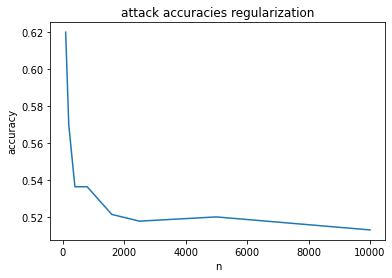

In [31]:
plt.plot(N, clf_reg_attacc)
plt.title("attack accuracies regularization")
plt.xlabel("n")
plt.ylabel("accuracy")
plt.show()

In [32]:
n = 400
train_X, test_X, train_y, test_y = split_dataset(n, X_train, X_test, y_train, y_test)
clf1 = train_logistic_regression(train_X, train_y, "none", 1)
clf2 = train_logistic_regression(train_X, train_y, "l2", 0.1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [41]:
def noise_acc(n, train_X, test_X, train_y, test_y, clf):
    sigmas2 = [0.1,0.2,0.3,0.4,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]

    ave_acc = dict()
    for s in sigmas2:
        ave_acc[s] = 0
        for count in range(1000):
            IN = []
            OUT = []
            # add noise to weights
            noise = np.random.normal(0, s, [clf.coef_.shape[0], clf.coef_.shape[1]])
            clf.coef_ = clf.coef_ + noise

            # build and predict data
            data = np.concatenate((train_X,test_X),axis=0)
            labels = np.concatenate((train_y,test_y),axis=0)
            pred_data = clf.predict(data)

            for j in range(len(pred_data)):
                if pred_data[j] == labels[j]:
                    IN.append(j)
                else:
                    OUT.append(j)

            true_IN = np.array([x for x in IN if x <= n-1])
            true_OUT = np.array([x for x in OUT if x > n-1])

        
            acc = (true_IN.shape[0] + true_OUT.shape[0])/len(data)

            ave_acc[s] += acc
        ave_acc[s] /= 1000
        print("sigma square = {}, the accuracy is: {}".format(s, ave_acc[s]))
    return ave_acc


In [42]:
highest_acc_clf_nonreg = noise_acc(n, train_X, test_X, train_y, test_y, clf1)

sigma square = 0.1, the accuracy is: 0.49898874999999365
sigma square = 0.2, the accuracy is: 0.4994324999999966
sigma square = 0.3, the accuracy is: 0.5027150000000034
sigma square = 0.4, the accuracy is: 0.5012525000000051
sigma square = 0.5, the accuracy is: 0.498976249999999
sigma square = 1, the accuracy is: 0.4998175000000004
sigma square = 1.5, the accuracy is: 0.5013425000000019
sigma square = 2, the accuracy is: 0.5001262500000005
sigma square = 2.5, the accuracy is: 0.49763874999999874
sigma square = 3, the accuracy is: 0.4926137499999989
sigma square = 3.5, the accuracy is: 0.4943599999999979
sigma square = 4, the accuracy is: 0.4979774999999978
sigma square = 4.5, the accuracy is: 0.49343999999999805
sigma square = 5, the accuracy is: 0.48565749999999785


In [43]:
highest_acc_clf_reg = noise_acc(n, train_X, test_X, train_y, test_y, clf2)

sigma square = 0.1, the accuracy is: 0.4988449999999893
sigma square = 0.2, the accuracy is: 0.498949999999989
sigma square = 0.3, the accuracy is: 0.49891249999998727
sigma square = 0.4, the accuracy is: 0.4986812499999889
sigma square = 0.5, the accuracy is: 0.49624374999999826
sigma square = 1, the accuracy is: 0.4956450000000003
sigma square = 1.5, the accuracy is: 0.49488374999999785
sigma square = 2, the accuracy is: 0.49524624999999695
sigma square = 2.5, the accuracy is: 0.49467249999999646
sigma square = 3, the accuracy is: 0.49578374999999775
sigma square = 3.5, the accuracy is: 0.5014637500000042
sigma square = 4, the accuracy is: 0.499692500000001
sigma square = 4.5, the accuracy is: 0.4998687500000046
sigma square = 5, the accuracy is: 0.49738499999999647


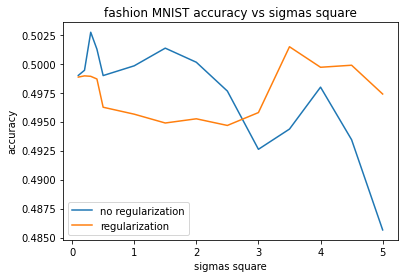

In [44]:
sigmas2 = list(highest_acc_clf_reg.keys())
accuracy1 = list(highest_acc_clf_nonreg.values())
accuracy2 = list(highest_acc_clf_reg.values())
plt.plot(sigmas2, accuracy1, label='no regularization')
plt.plot(sigmas2, accuracy2, label='regularization')
plt.title("fashion MNIST accuracy vs sigmas square")
plt.xlabel("sigmas square")
plt.ylabel("accuracy")
plt.legend()
plt.show()